In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

random_state = 101
path_import_and_export = "../../../Thesis_data/processed_data/"

In [4]:
ontime_reporting_export = pd.read_csv(path_import_and_export + "ontime_reporting_export.csv")

In [5]:
#Check percent of missing data
round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

MONTH                  0.00
DAY_OF_MONTH           0.00
DAY_OF_WEEK            0.00
OP_UNIQUE_CARRIER      0.00
TAIL_NUM               0.24
ORIGIN_AIRPORT_ID      0.00
ORIGIN                 0.00
ORIGIN_CITY_NAME       0.00
DEST                   0.00
CRS_DEP_TIME           0.00
DEP_TIME               1.76
DEP_DEL15              1.76
DISTANCE_GROUP         0.00
MANUFACTURE_YEAR       4.76
NUMBER_OF_SEATS        4.76
AWND                   9.87
PRCP                   9.89
SNOW                  39.43
SNWD                  41.41
TMAX                   9.87
MEDIAN_AGE            14.49
TOT_POP               14.49
AVG_HOUSEHOLD_SIZE    14.86
dtype: float64

In [6]:
#Setting dtypes

# 1. Cleaning missing data
## 1.1 Cleaning missing: Dependant variable (DEP_DEL15)

In [7]:
#Deleting empty DEP_DEL15 records as this is the target value and imputing doesnt make sense here as it would only introduce noise
ontime_reporting_export = ontime_reporting_export.dropna(subset=['DEP_DEL15'])
round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

MONTH                  0.00
DAY_OF_MONTH           0.00
DAY_OF_WEEK            0.00
OP_UNIQUE_CARRIER      0.00
TAIL_NUM               0.00
ORIGIN_AIRPORT_ID      0.00
ORIGIN                 0.00
ORIGIN_CITY_NAME       0.00
DEST                   0.00
CRS_DEP_TIME           0.00
DEP_TIME               0.00
DEP_DEL15              0.00
DISTANCE_GROUP         0.00
MANUFACTURE_YEAR       4.51
NUMBER_OF_SEATS        4.51
AWND                   9.82
PRCP                   9.84
SNOW                  39.42
SNWD                  41.40
TMAX                   9.83
MEDIAN_AGE            14.45
TOT_POP               14.45
AVG_HOUSEHOLD_SIZE    14.82
dtype: float64

## 1.2 Cleaning missing: Weather data

<AxesSubplot: >

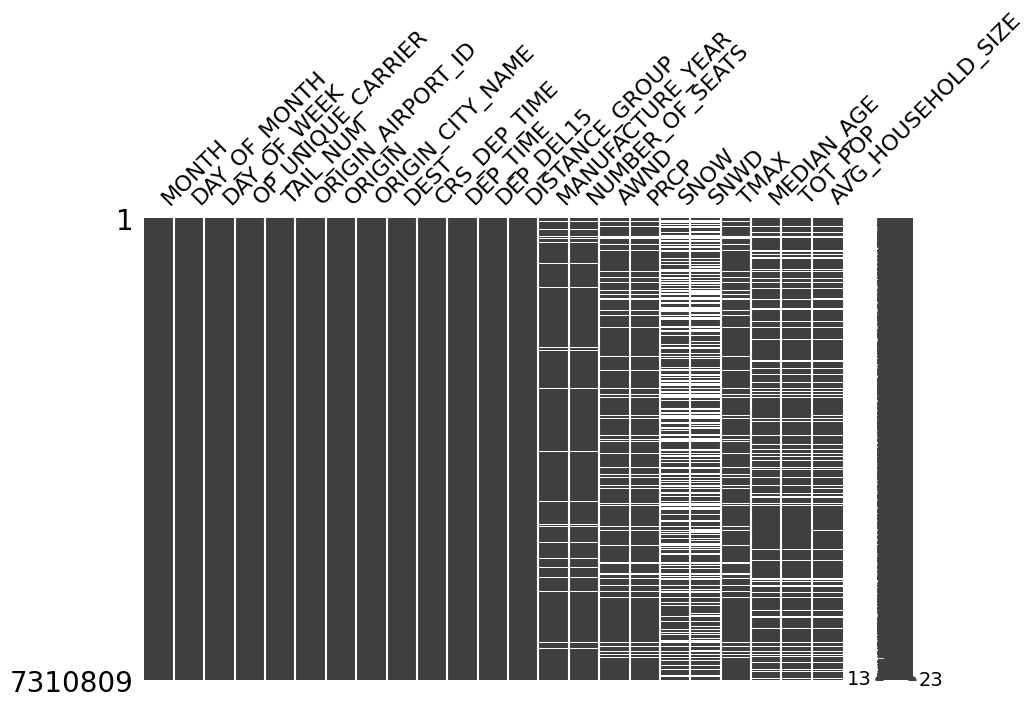

In [8]:
msno.matrix(ontime_reporting_export, figsize=(10, 6))

In [3]:
Empty_Weather = ontime_reporting_export.loc[ontime_reporting_export['AWND'].isnull(), :]

In [7]:
check_airport = ontime_reporting_export.loc[ontime_reporting_export['ORIGIN_AIRPORT_ID'] == 11150, :]

In [9]:
check_airport.count()

MONTH                1274
DAY_OF_MONTH         1274
DAY_OF_WEEK          1274
OP_UNIQUE_CARRIER    1274
TAIL_NUM             1274
ORIGIN_AIRPORT_ID    1274
ORIGIN               1274
DEST                 1274
DEP_TIME             1269
DEP_DELAY_NEW        1269
DEP_DEL15            1269
DISTANCE_GROUP       1274
MANUFACTURE_YEAR     1255
NUMBER_OF_SEATS      1255
AWND                    0
PRCP                    0
SNOW                    0
SNWD                    0
TMAX                    0
dtype: int64

In [5]:
#Is the missing data MNAR, MCAR or MAR? <- Question Drew, how to check? Chi-Square for MNAR? Covariance matrix?


#Imputing only Average Daily Wind Speed (AWND) and Max Temperature (TMAX) because they should be filled daily with NA's considerd missing
MI_columns = ontime_reporting_export.loc[:, ["AWND","TMAX"]]

Multivariate_imputer = IterativeImputer(random_state=random_state, max_iter=10)
df_imputed = Multivariate_imputer.fit_transform(MI_columns)

#Replace NA's with imputed values
ontime_reporting_export.loc[:, ["AWND","TMAX"]] = df_imputed
round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

MONTH                 0.00
DAY_OF_MONTH          0.00
DAY_OF_WEEK           0.00
OP_UNIQUE_CARRIER     0.00
TAIL_NUM              0.00
ORIGIN_AIRPORT_ID     0.00
ORIGIN                0.00
DEST                  0.00
DEP_TIME              0.00
DEP_DELAY_NEW         0.00
DEP_DEL15             0.00
DISTANCE_GROUP        0.00
MANUFACTURE_YEAR      4.51
NUMBER_OF_SEATS       4.51
AWND                  0.00
PRCP                  9.84
SNOW                 39.42
SNWD                 41.40
TMAX                  0.00
dtype: float64

In [6]:
#Replace NA's in columns (PRCP), (SNOW) and (SNWD) with 0 as they can be missing, it just means it did not snow or rain that day
ontime_reporting_export[["PRCP", "SNOW", "SNWD"]] = ontime_reporting_export[["PRCP", "SNOW", "SNWD"]].fillna(0)
round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

MONTH                0.00
DAY_OF_MONTH         0.00
DAY_OF_WEEK          0.00
OP_UNIQUE_CARRIER    0.00
TAIL_NUM             0.00
ORIGIN_AIRPORT_ID    0.00
ORIGIN               0.00
DEST                 0.00
DEP_TIME             0.00
DEP_DELAY_NEW        0.00
DEP_DEL15            0.00
DISTANCE_GROUP       0.00
MANUFACTURE_YEAR     4.51
NUMBER_OF_SEATS      4.51
AWND                 0.00
PRCP                 0.00
SNOW                 0.00
SNWD                 0.00
TMAX                 0.00
dtype: float64

## 1.3 Cleaning missing: Aircraft inventory data

In [20]:
#Converting MANUFACTURE_YEAR and NUMBER_OF_SEATS to intergers while retaining the NA values for imputation
ontime_reporting_export['MANUFACTURE_YEAR'] = ontime_reporting_export['MANUFACTURE_YEAR'].astype('Int64')
ontime_reporting_export['NUMBER_OF_SEATS'] = ontime_reporting_export['NUMBER_OF_SEATS'].astype('Int64')

#Imputing MANUFACTURE_YEAR and NUMBER_OF_SEATS using Multiple 
MI_columns = ontime_reporting_export.loc[:, ["MANUFACTURE_YEAR","NUMBER_OF_SEATS"]]

Multivariate_imputer = IterativeImputer(random_state=random_state, max_iter=10)
df_imputed = Multivariate_imputer.fit_transform(MI_columns)

#Replace NA's with imputed values
ontime_reporting_export.loc[:, ["MANUFACTURE_YEAR","NUMBER_OF_SEATS"]] = df_imputed
round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

C:\Users\Rvanl\AppData\Local\Temp\ipykernel_7444\1020232982.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ontime_reporting_export.loc[:, ["MANUFACTURE_YEAR","NUMBER_OF_SEATS"]] = df_imputed


MONTH                0.0
DAY_OF_MONTH         0.0
DAY_OF_WEEK          0.0
OP_UNIQUE_CARRIER    0.0
TAIL_NUM             0.0
ORIGIN_AIRPORT_ID    0.0
ORIGIN               0.0
DEST                 0.0
DEP_TIME             0.0
DEP_DELAY_NEW        0.0
DEP_DEL15            0.0
DISTANCE_GROUP       0.0
MANUFACTURE_YEAR     0.0
NUMBER_OF_SEATS      0.0
AWND                 0.0
PRCP                 0.0
SNOW                 0.0
SNWD                 0.0
TMAX                 0.0
dtype: float64

# 2. Exploratory Data Analysis (EDA)

C:\Users\Rvanl\AppData\Local\Temp\ipykernel_7444\322457552.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ontime_reporting_export.corr(), vmin=-1, vmax=1, annot=True)


<AxesSubplot: >

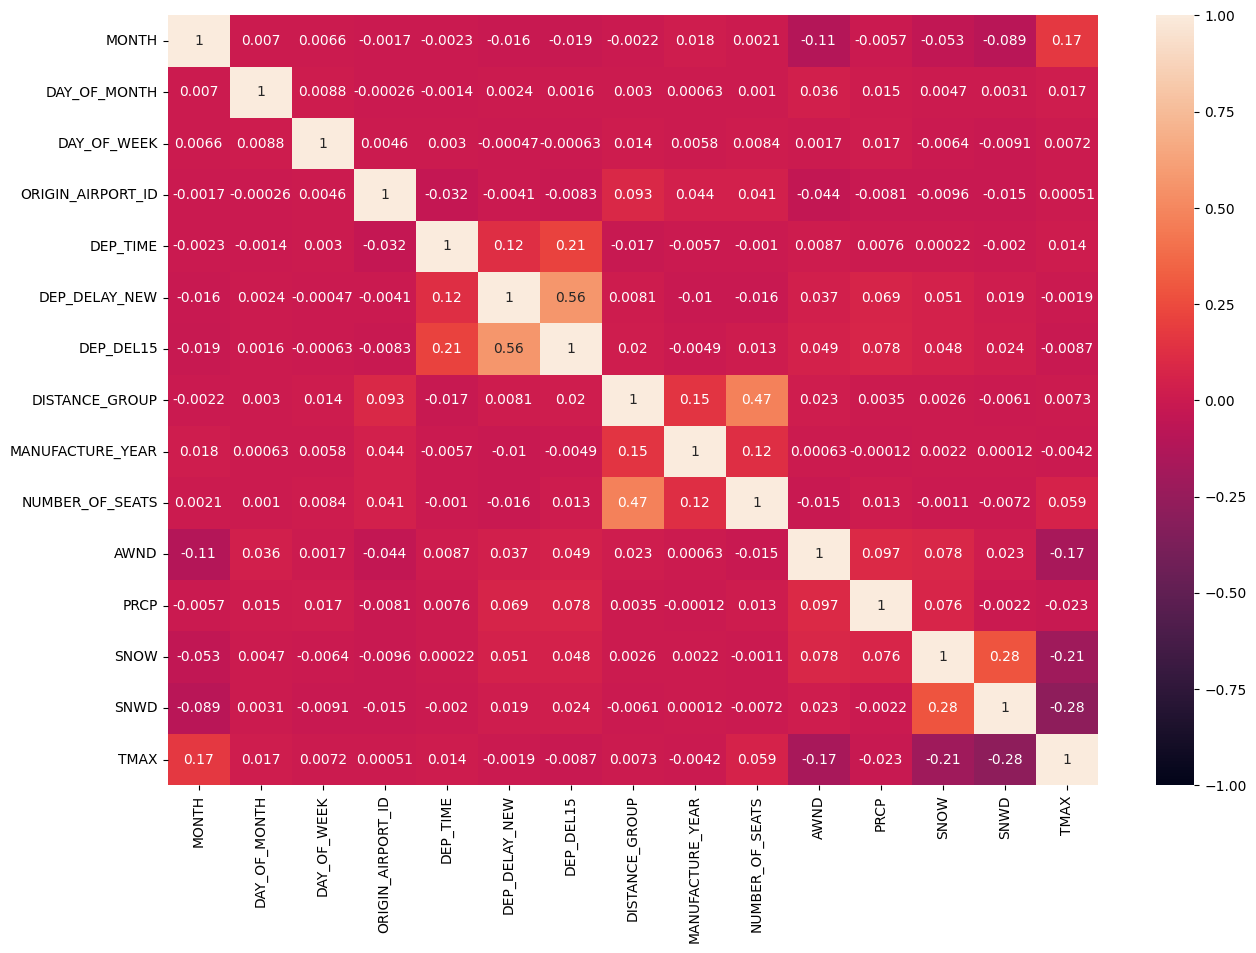

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(ontime_reporting_export.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
plt.ticklabel_format(style='plain')
ontime_reporting_export["DEP_DEL15"] = ontime_reporting_export["DEP_DEL15"].astype("category")
ontime_reporting_export["DEP_DEL15"].value_counts().plot(kind='bar')
plt.show()

In [ ]:
def describe(df):
    return pd.concat([df.describe().T,
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                      df.median().rename('median'),
                     ], axis=1).T

describe(ontime_reporting_export)

In [ ]:
#Boxplots for outlier visualization

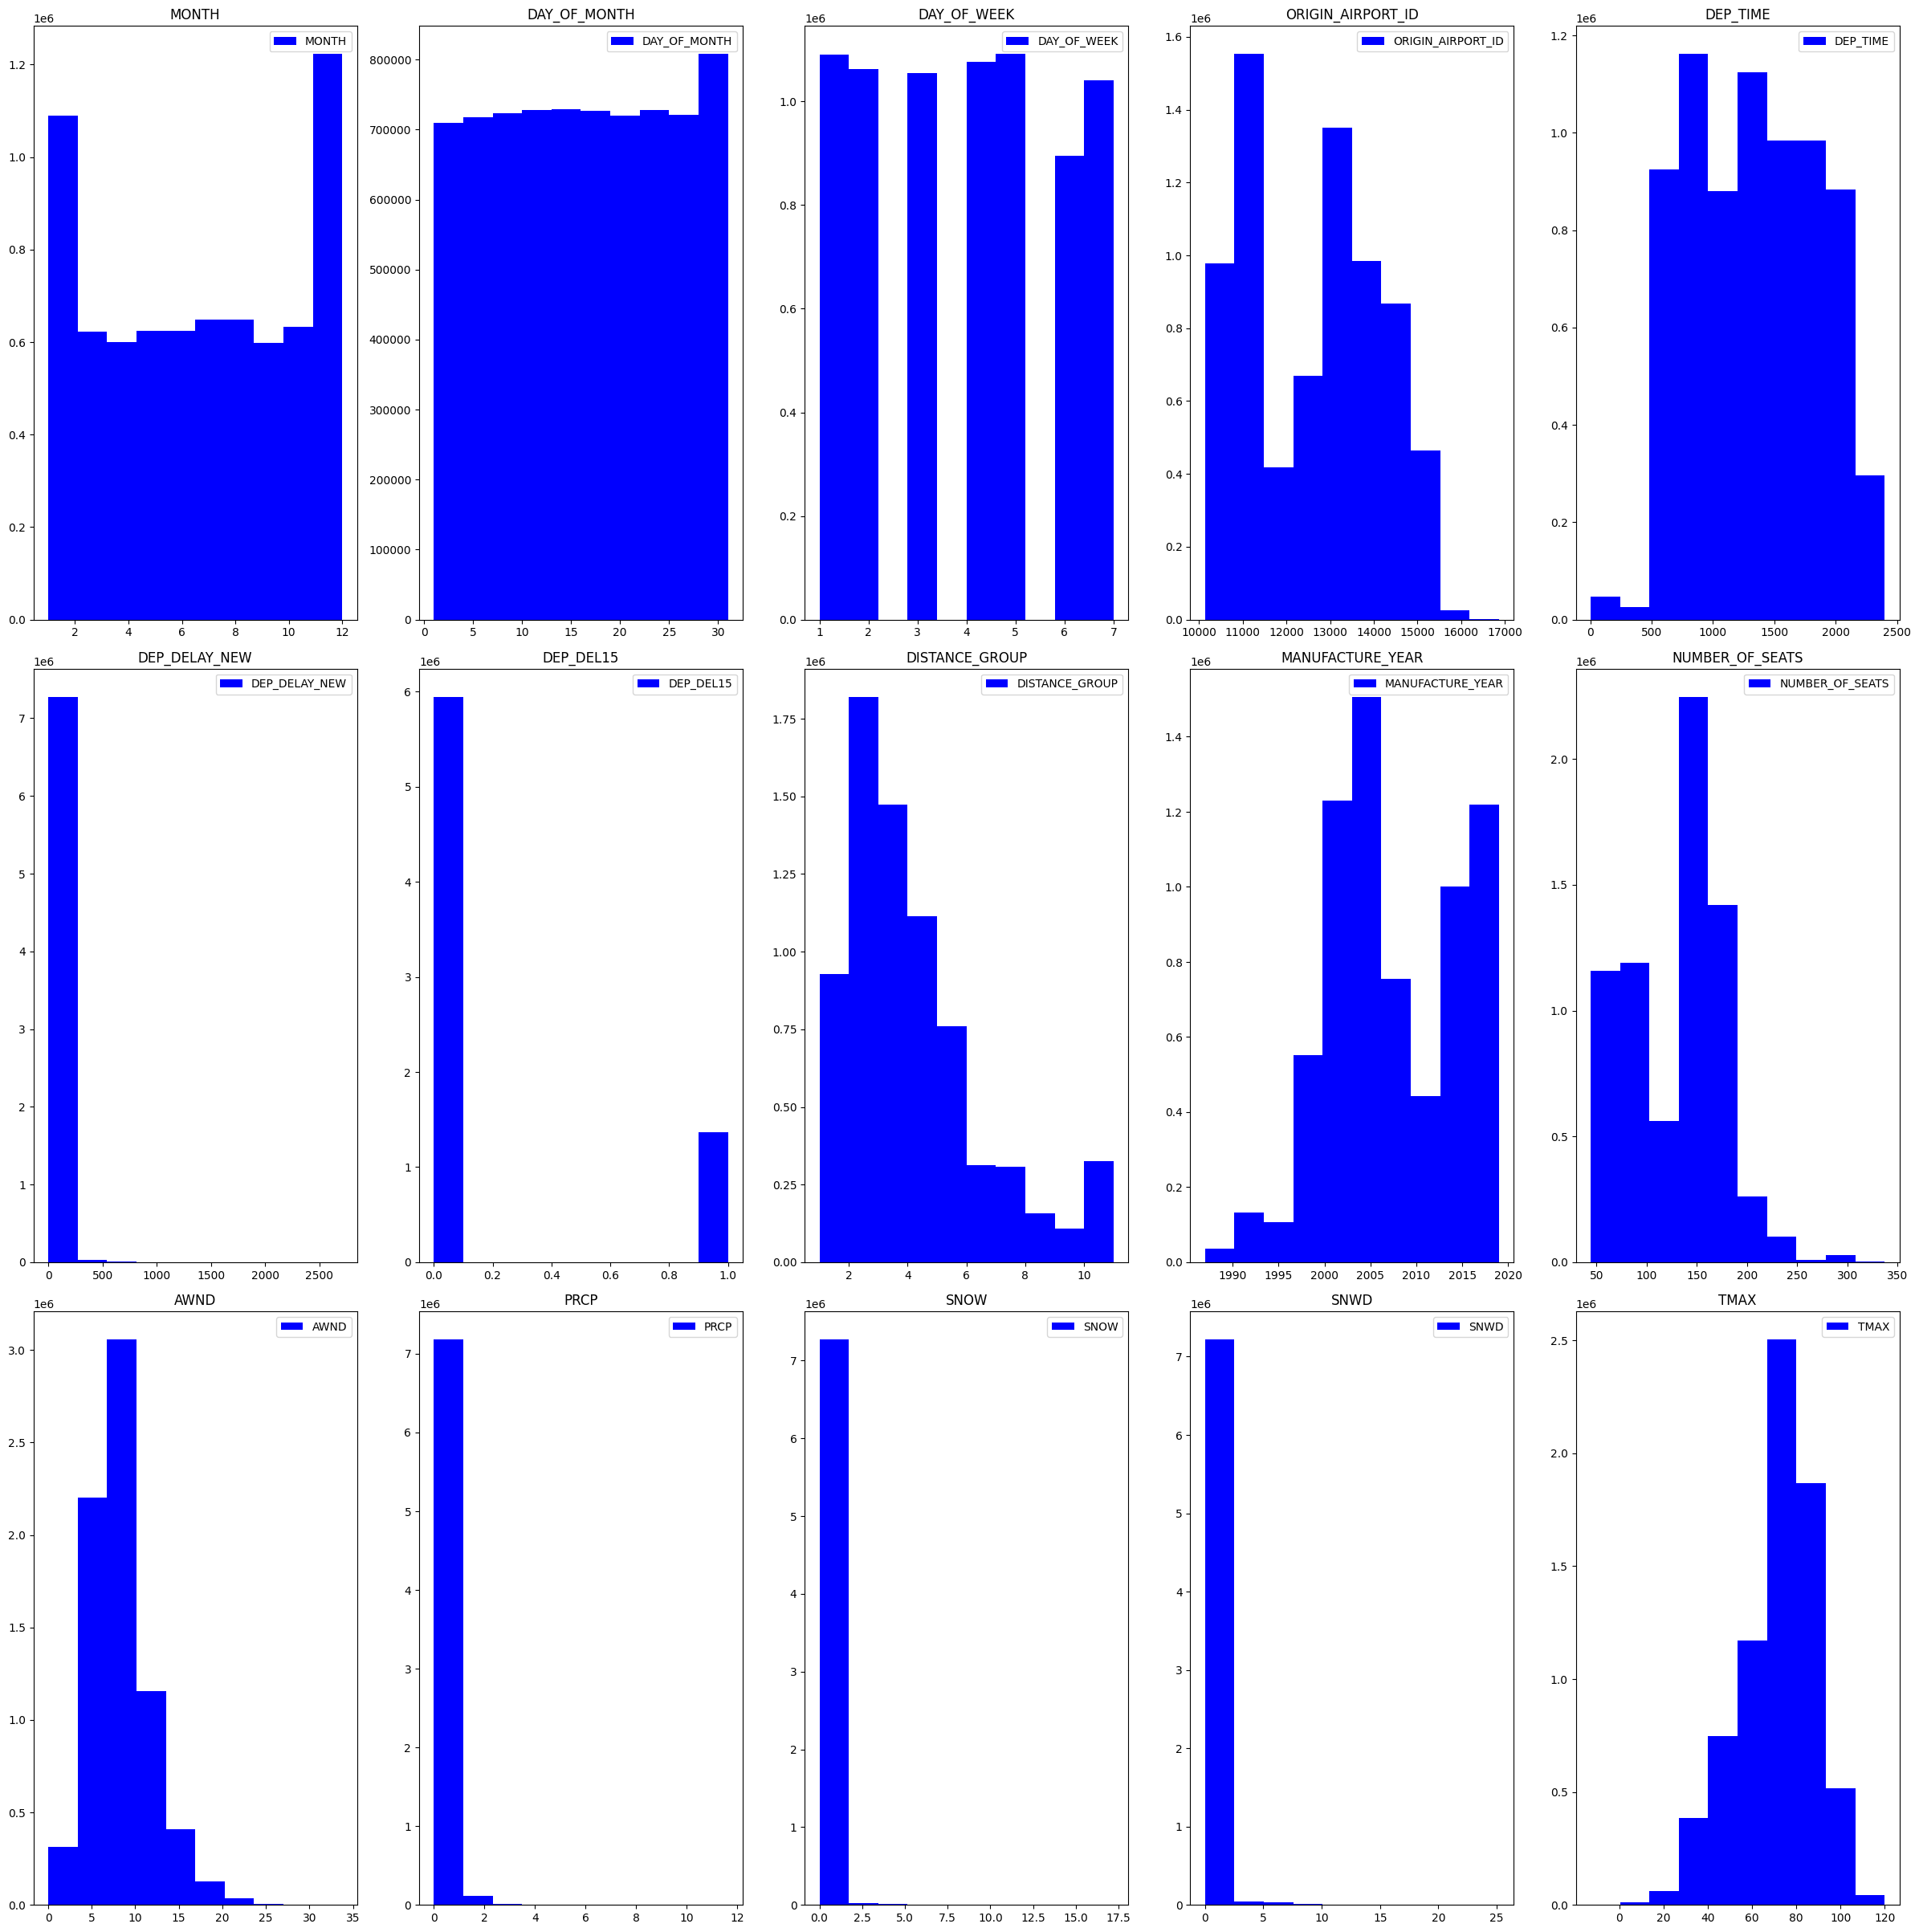

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,200))
cols = ontime_reporting_export.loc[:, ~ontime_reporting_export.columns.isin(["OP_UNIQUE_CARRIER", "TAIL_NUM", "ORIGIN", "DEST"])]
try:
    for i, col in enumerate(cols):
        plt.subplot(25, 5, i+1)
        plt.hist(ontime_reporting_export[col], label=col, color="blue")
        plt.legend()
        plt.title(col)
        plt.tight_layout()
except Exception as e:
    print(col,e)

# 3. Feature Engineering

In [ ]:
#Feature Enginering of "Previous_flight_delayed"
ontime_reporting_export = ontime_reporting_export.sort_values(['MONTH', 'DAY_OF_MONTH', 'TAIL_NUM', 'DEP_TIME'])
ontime_reporting_export["PREV_FLIGHT_DELAY"] = 0
ontime_reporting_export.loc[(ontime_reporting_export["TAIL_NUM"] == ontime_reporting_export["TAIL_NUM"].shift(1)) & (ontime_reporting_export["DEP_DEL15"].shift(1) == True), "PREV_FLIGHT_DELAY"] = 1

In [ ]:
#Exporting the cleaned dataset
ontime_reporting_export.to_csv("ontime_reporting_clean_export.csv", index=False)